In [3]:

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from matplotlib import pyplot as plt
import time
import sys
import cv2 as cv

In [4]:
np.set_printoptions(threshold=sys.maxsize)

In [5]:
def rectangle(mat,color,image):
    rect = cv.minAreaRect(mat)
    height = rect[1][1]
    width = rect[1][0]
    x = rect[0][0] - width/2
    x = np.int0(x)
    y = rect[0][1] - height/1.7
    y = np.int0(y)
    font = cv.FONT_HERSHEY_SIMPLEX
    print(color)
    if(color == 'none'):
        cv.putText(image,'noise',(x,y), font, 0.5,(255,255,255),2,cv.LINE_AA)
    elif((1.5*width < height and 3.5*width > height) or (1.5*height < width and 3.5*height > width)):
        cv.putText(image,color+' buoy',(x,y), font, 0.5,(255,255,255),2,cv.LINE_AA)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    cv.drawContours(image,[box],0,(255,0,255),2)
    return image

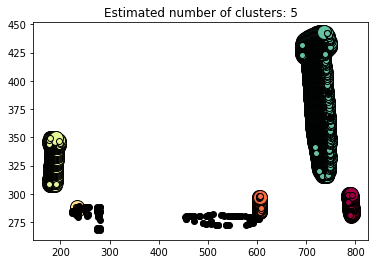

In [8]:
image = cv.imread('output_images/hsv (preprocessing)/hsv0290.jpg')
img = image.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,thresh1 = cv.threshold(img,40,255,cv.THRESH_BINARY)

nonzero = np.nonzero(thresh1)

yp = np.array(nonzero[0])
xp = np.array(nonzero[1])


X=np.column_stack((xp,yp))
if (len(X) > 0):
    db = DBSCAN(eps=3, min_samples=15).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()
#     array = zip(xp,yp,labels)
#     sort = sorted(list(array), key=lambda x: x[2])
#     x = 0

#     while (len(sort) > 0 and sort[x][2] == -1):
#         del sort[x]

#     if (len(sort) > 0):
#         unique_labels = sorted(set(labels))
#         if (unique_labels[0] == -1):
#             unique_labels.remove(-1)
#         points = sort.copy()
#         points = np.delete(points,2,1)

#         i = 0
#         x = 0
#         l = []

#         while (x < len(unique_labels)):
#             if (i < len(sort) and sort[i][2] == x):
#                 l.append(points[i])
#                 i+=1
#             else:
#                 x+=1
#                 clr = color(np.array(l),image)
#                 tb = rectangle(np.array(l),clr,image)
#                 l = []
#         image = tb   
# cv.imshow('image',image)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [6]:
def color(mat,image):
    sumred = 0
    sumgrn = 0
    sumblu = 0
    for x in range(len(mat)):
        sumred += image[mat[x][1]][mat[x][0]][2]
        sumgrn += image[mat[x][1]][mat[x][0]][1]
        sumblu += image[mat[x][1]][mat[x][0]][0]
    print(sumred/len(mat))
    print(sumgrn/len(mat))
    print(sumblu/len(mat))
    if ((sumred/len(mat)) > 100 and (sumred/len(mat)) < 180 and (sumgrn/len(mat)) > 30 and (sumgrn/len(mat)) < 115  and (sumblu/len(mat)) > 30 and (sumblu/len(mat)) < 110):
        return 'red'
    if ((sumred/len(mat)) > 50 and (sumred/len(mat)) < 100 and (sumgrn/len(mat)) > 80 and (sumgrn/len(mat)) < 180  and (sumblu/len(mat)) > 50 and (sumblu/len(mat)) < 130):
        return 'green'
    else:
        return 'none'